# Building footprint (plus street network) figure-ground diagrams

Author: [Geoff Boeing](https://geoffboeing.com/)

Use OSMnx to download OpenStreetMap building footprints and visualize them as figure-ground diagrams.

  - [Documentation](https://osmnx.readthedocs.io/)
  - [Journal article and citation info](https://geoffboeing.com/publications/osmnx-paper/)
  - [Code repository](https://github.com/gboeing/osmnx)
  - [Examples gallery](https://github.com/gboeing/osmnx-examples)

In [1]:
import osmnx as ox
from IPython.display import Image

ox.__version__

'2.0.2'

In [2]:
# configure the inline image display
img_folder = "images"
extension = "png"
size = 240

# specify that we're retrieving building features from OSM
tags = {"building": True}

## Building footprints within the city limits of Piedmont, California

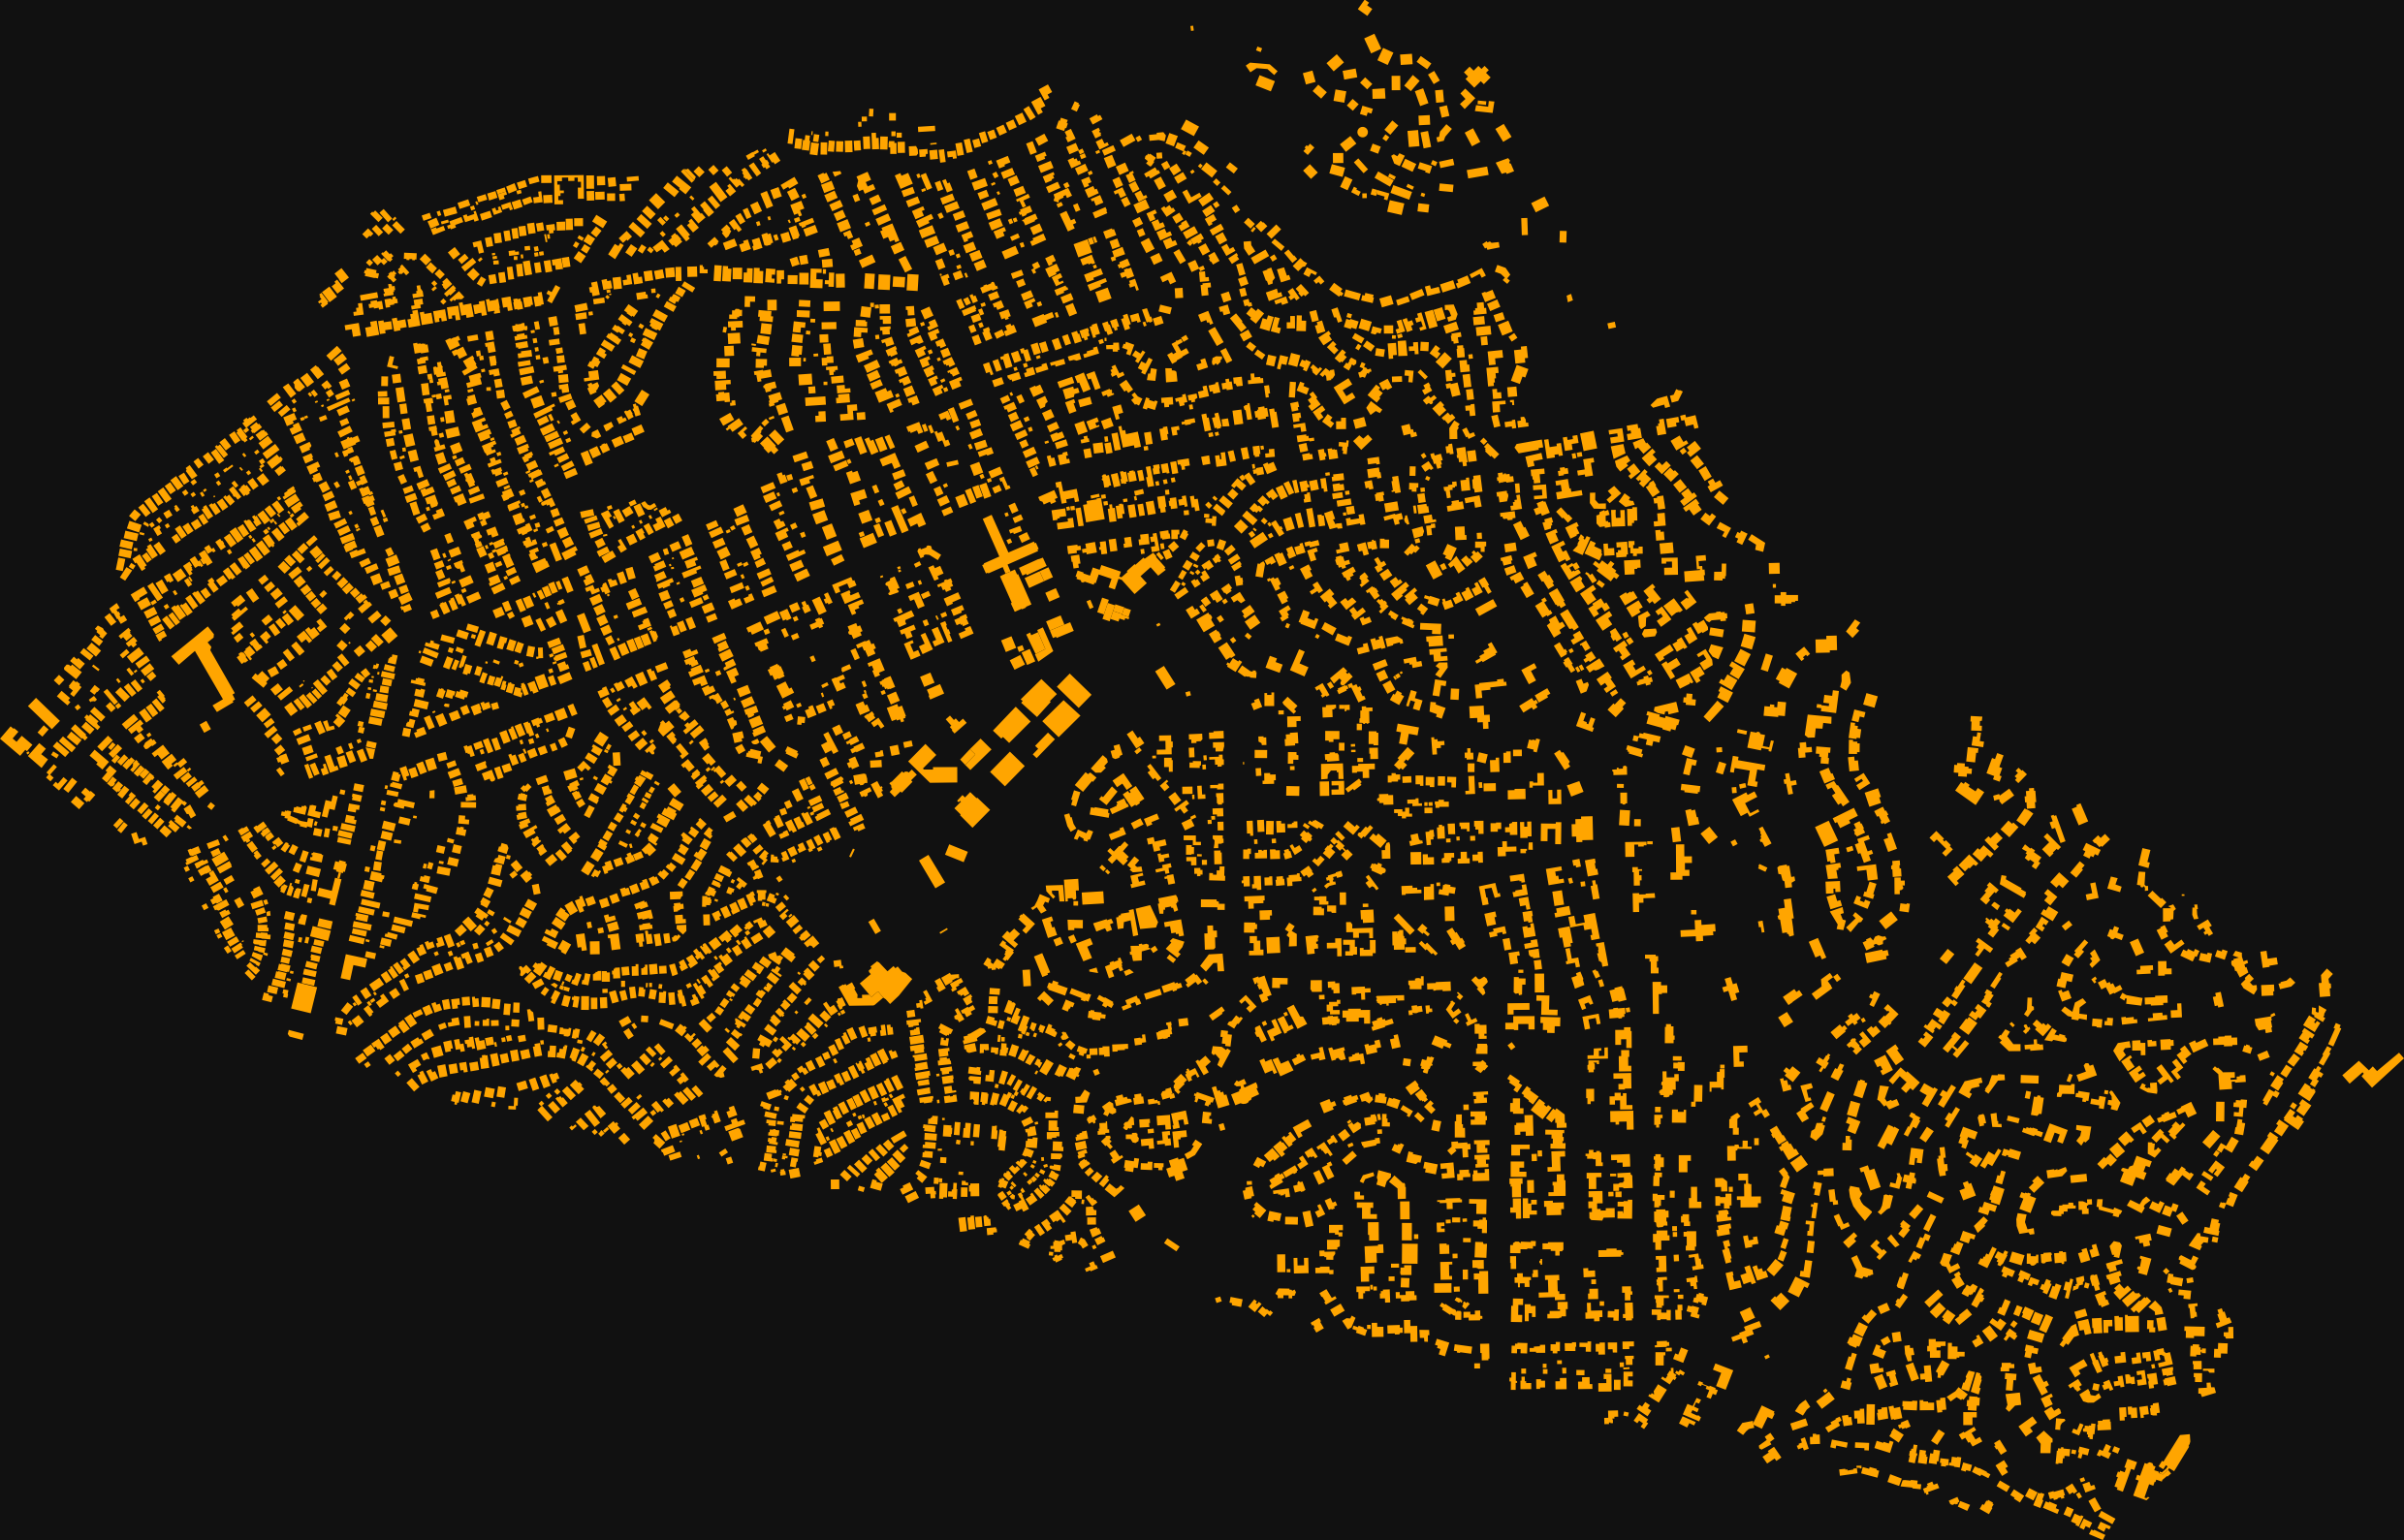

In [3]:
gdf = ox.features.features_from_place("Piedmont, California, USA", tags)
gdf_proj = ox.projection.project_gdf(gdf)
fp = f"./{img_folder}/piedmont_bldgs.{extension}"
fig, ax = ox.plot.plot_footprints(gdf_proj, filepath=fp, dpi=400, save=True, show=False, close=True)
Image(fp, height=size, width=size)

In [4]:
# save as a GeoPackage
gdf_save = gdf.map(lambda x: str(x) if isinstance(x, list) else x)
gdf_save.to_file("./data/piedmont_bldgs.gpkg", driver="GPKG")

#### Now let's analyze the size of the building footprints...

In [5]:
# calculate the area in projected units (meters) of each building footprint, then display first five
areas = gdf_proj.area
areas.head()

element   id        
node      3153686913       0.000000
relation  3349739        464.852571
way       28861558      1830.805124
          28861563       779.361416
          28861579      1389.071872
dtype: float64

In [6]:
# total area (sq m) covered by building footprints
sum(areas)

879254.5529246063

In [7]:
# get the total area within Piedmont's admin boundary in sq meters
place = ox.geocoder.geocode_to_gdf("Piedmont, California, USA")
place_proj = ox.projection.project_gdf(place)
place_proj.area.iloc[0]

np.float64(4348556.9414643)

In [8]:
# what proportion of piedmont is covered by building footprints?
sum(areas) / place_proj.area.iloc[0]

np.float64(0.2021945589675394)

## One and a half square kilometers near the Arc de Triomphe

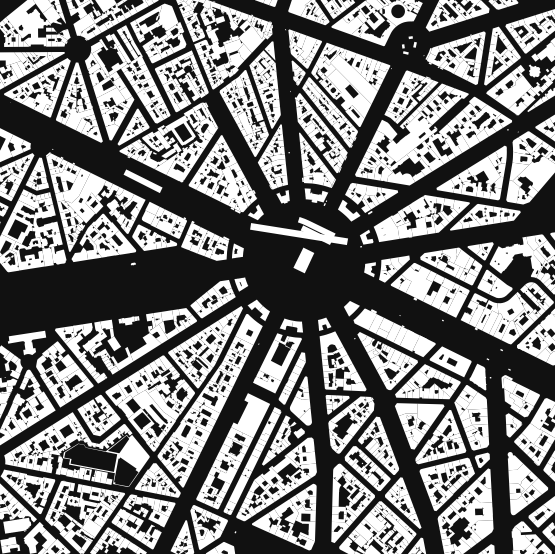

In [9]:
point = (48.873446, 2.294255)
dist = 612
gdf = ox.features.features_from_point(point, tags, dist=dist)
gdf_proj = ox.projection.project_gdf(gdf)
bbox = ox.utils_geo.bbox_from_point(point=point, dist=dist, project_utm=True)
fp = f"./{img_folder}/paris_bldgs.{extension}"
fig, ax = ox.plot.plot_footprints(
    gdf_proj,
    bbox=bbox,
    color="w",
    filepath=fp,
    dpi=90,
    save=True,
    show=False,
    close=True,
)
Image(fp, height=size, width=size)

## Street network + building footprints: square-mile visualizations

Plot and save to disk as .png

In [10]:
# helper funcion to get one-square-mile street networks, building footprints, and plot them


def make_plot(
    place,
    point,
    network_type="drive",
    default_width=4,
    street_widths=None,
):
    dpi = 40
    dist = 805
    fp = f"./{img_folder}/{place}.{extension}"

    G = ox.graph.graph_from_point(
        point, dist=dist, network_type=network_type, truncate_by_edge=True
    )
    gdf = ox.features.features_from_point(point, tags, dist=dist)
    fig, ax = ox.plot.plot_figure_ground(
        G=G,
        dist=dist,
        default_width=default_width,
        street_widths=street_widths,
        save=False,
        show=False,
        close=True,
    )
    fig, ax = ox.plot.plot_footprints(
        gdf, ax=ax, filepath=fp, dpi=dpi, save=True, show=False, close=True
    )

    return fp

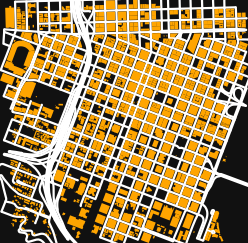

In [11]:
place = "portland_buildings"
point = (45.517309, -122.682138)
Image(make_plot(place, point), height=size, width=size)

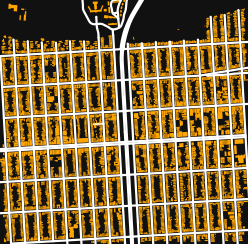

In [12]:
place = "richmond_district_buildings"
point = (37.781999, -122.472501)
Image(make_plot(place, point), height=size, width=size)

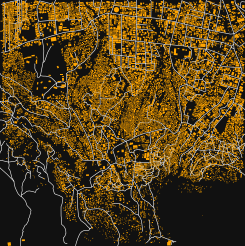

In [13]:
place = "port_au_prince_buildings"
point = (18.522240, -72.347607)
fp = make_plot(place, point, network_type="all", default_width=1, street_widths={"secondary": 3})
Image(fp, height=size, width=size)

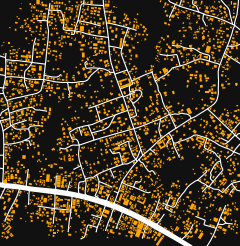

In [14]:
place = "monrovia_liberia_buildings"
point = (6.340236, -10.747255)
fp = make_plot(place, point, network_type="all", default_width=2, street_widths={"primary": 6})
Image(fp, height=size, width=size)